# Analisis de cable Fakra.

In [2]:
# Cargar librerias.
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Vamos a definir funciones que nos serán utiles para una mejor manipulación de las imagenes.

In [3]:
def mostrar_imagen(titulo, imagen):
    plt.figure(figsize=(10,8))
    plt.imshow(imagen, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

def mostrar_histograma(titulo, imagen):
    # calcHist([imagen], [canal], máscara, [tamaño_hist], [rango])
    hist = cv.calcHist([imagen], [0], None, [256], [0,256])

    plt.figure(figsize=(10,4))
    plt.plot(hist, color='black')
    plt.title(titulo)
    plt.xlabel('Intensidad de Píxel (0=Negro, 255=Blanco)')
    plt.ylabel('Cantidad de Píxeles')
    plt.xlim([0,256])
    plt.grid(True)
    plt.show()

¿Cómo son nuestras imagenes?

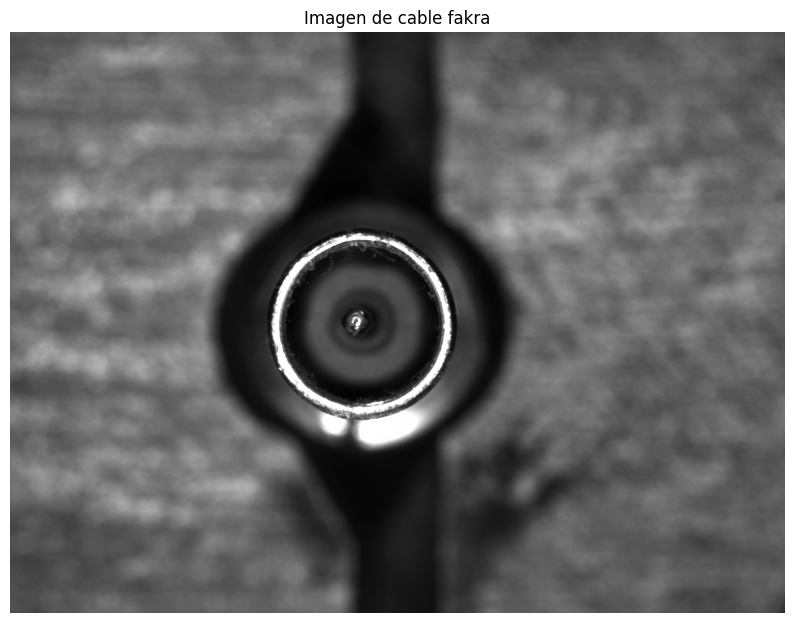

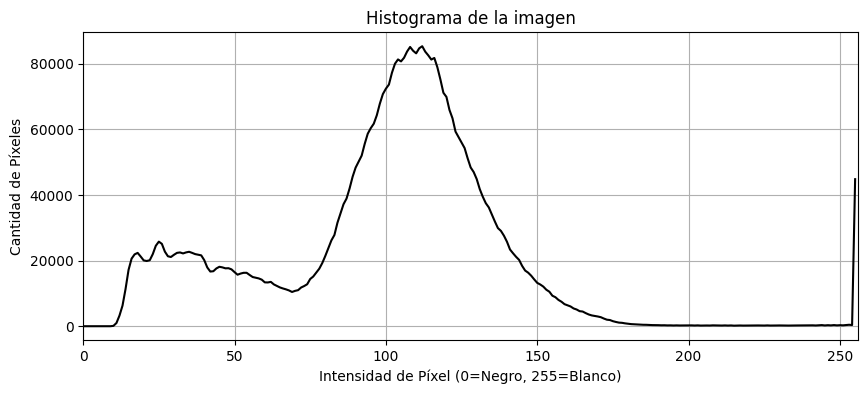

In [4]:
img_fakra = cv.imread('datasets_piezas_te/Product_RTK_031_Male_Left/OK/Left_20230217101939_NG.bmp', cv.IMREAD_GRAYSCALE)

mostrar_imagen('Imagen de cable fakra', img_fakra)
mostrar_histograma('Histograma de la imagen', img_fakra)

Vamos a preparar la imagén para encontrar el anillo exterior y el pin central.

La imagen presenta fondo texturizado y reflejos.

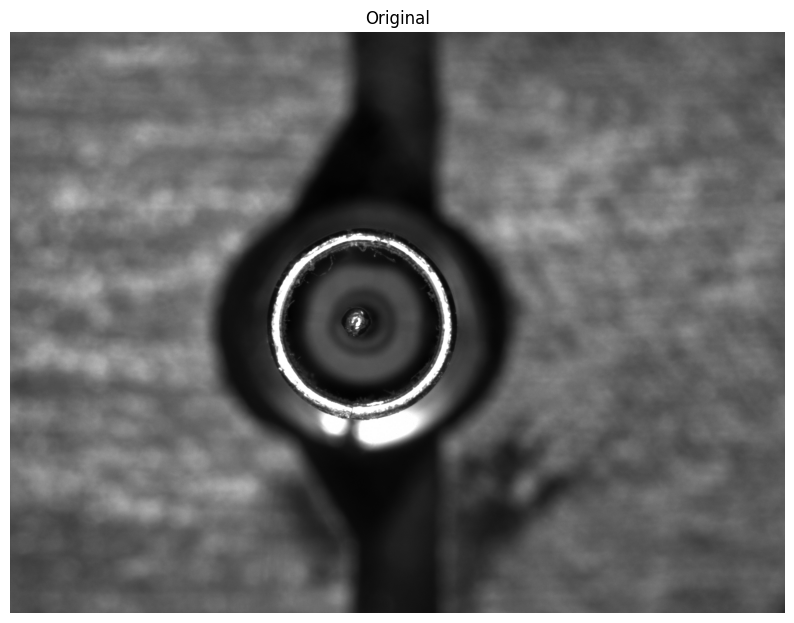

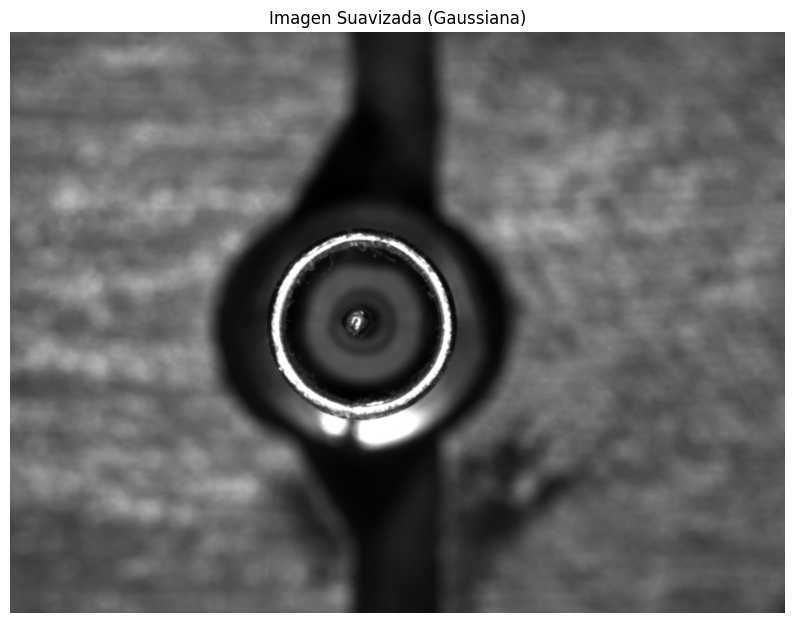

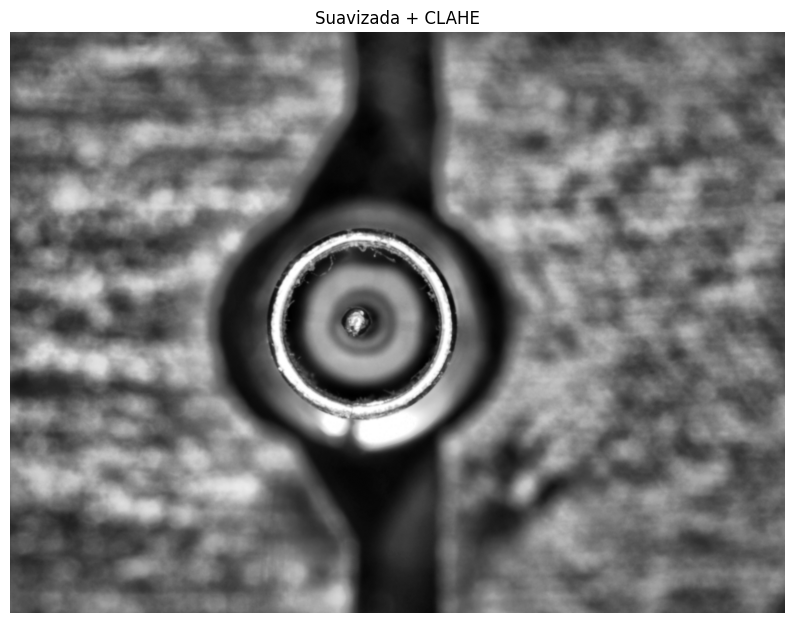

In [5]:
img_suavizada = cv.GaussianBlur(img_fakra, (9,9), 0)

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

img_clahe = clahe.apply(img_suavizada)

mostrar_imagen('Original', img_fakra)
mostrar_imagen('Imagen Suavizada (Gaussiana)', img_suavizada)
mostrar_imagen('Suavizada + CLAHE', img_clahe)


Vamos a romper el puente entre el reflejo de abajo y el del anillo con morfología

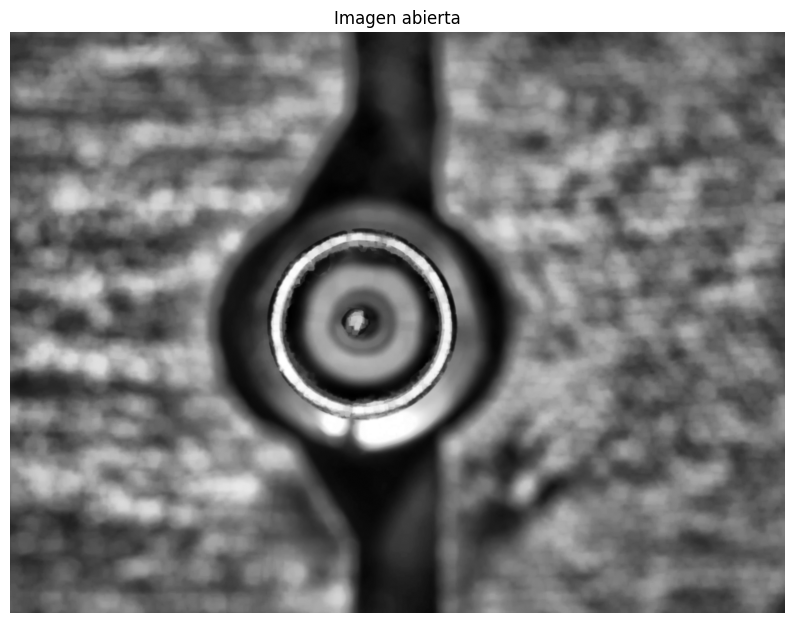

In [6]:
kernel = np.ones((7,7), np.uint8)

img_abierta = cv.morphologyEx(img_clahe, cv.MORPH_OPEN, kernel, iterations=2)

mostrar_imagen('Imagen abierta', img_abierta)

# 1. Detección de Bordes (Canny)

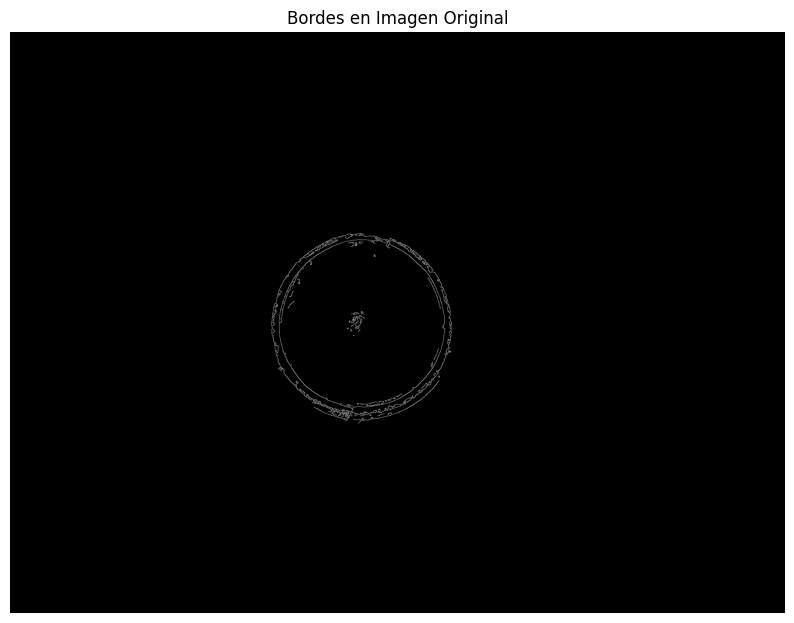

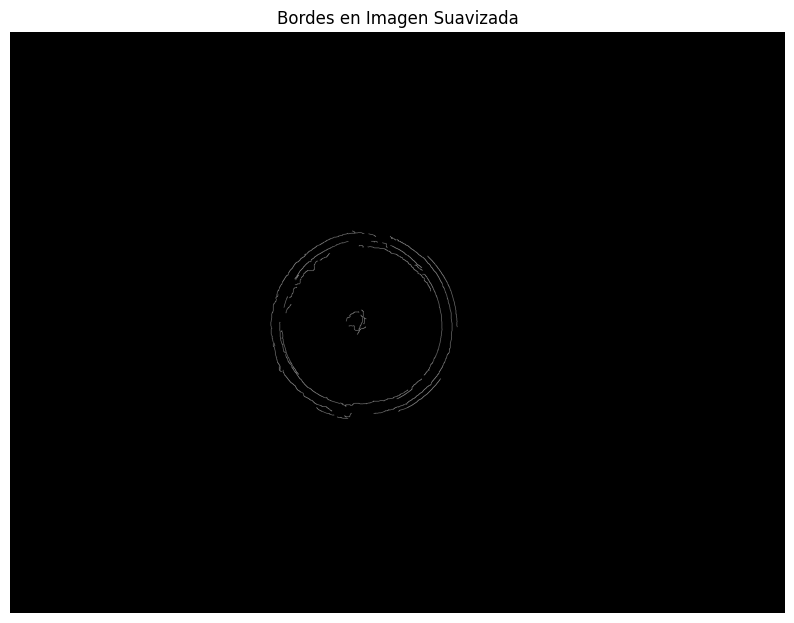

In [7]:
bordes_original = cv.Canny(img_fakra, 100, 200)

bordes_suavizados = cv.Canny(img_abierta, 100, 200)

mostrar_imagen('Bordes en Imagen Original', bordes_original)
mostrar_imagen('Bordes en Imagen Suavizada', bordes_suavizados)

# 2. Detección de Círculos (Transformada de Hough)

Intentaremos capturar el anillo y el pin juntos.

In [15]:
img_circulos = cv.cvtColor(img_fakra, cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(
    bordes_original,
    cv.HOUGH_GRADIENT, # Metodo (siempre para canny)
    1,  # dp: Relación de resolución, (1 = misma resolución)
    50, # minDist: Distancia mínima entre centros de círculos detectados
    param1=100, # Umbral superior para el detector de bordes Canny
    param2=30, # Umbral para el acumulador de centros de círculos
    minRadius=10, # Radio mínimo a detectar
    maxRadius=50 # Radio máximo a detectar
)

if circles is not None:
    circles = np.uint16(np.around(circles))

    print(f"Se encontraron {len(circles[0])} círculos.")

    for i in circles[0, :]:

        cv.circle(img_circulos, (i[0], i[1]), 2, (0, 255, 0), 3)

        cv.circle(img_circulos, (i[0], i[1]), i[2], (0, 0, 255), 2)
    mostrar_imagen('Círculos Detectados (Hough)', img_circulos)
else:
    print("No se encontraron círculos.")

No se encontraron círculos.


No encontramos parametros justos para poder tener ambos de un solo "procesamiento"

**¿Qué podemos hacer?**

Intento de solución:

# 4. Mediciones (Concentricidad)

en proceso...